# Create Cohort Analysis Chart Using Python 📊

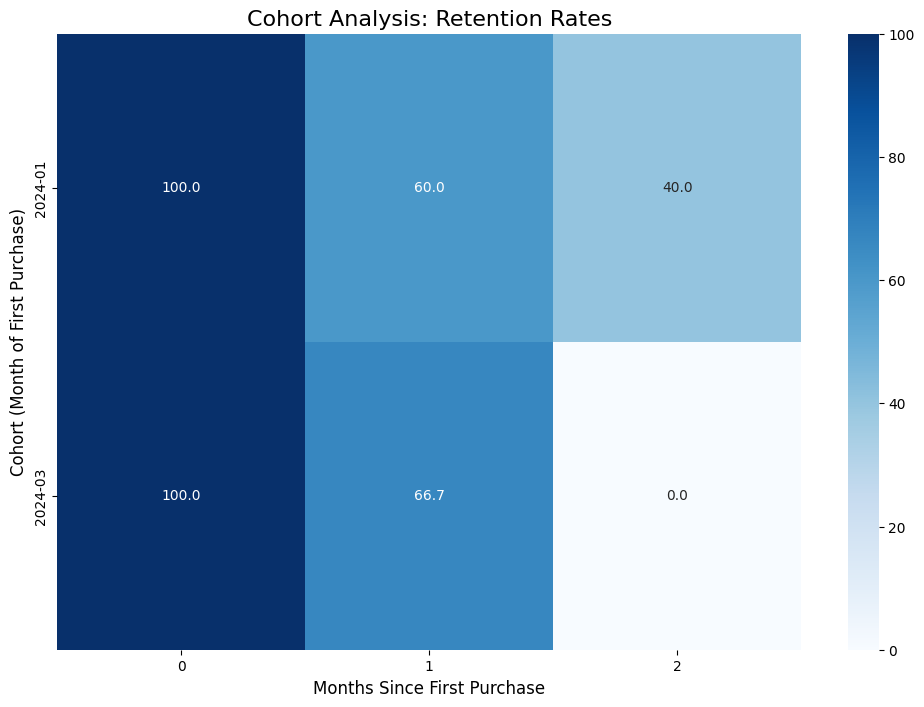

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample transaction data
data = {
    "CustomerID": [1, 2, 3, 4, 5, 1, 2, 3, 1, 2, 6, 7, 8, 6, 7],
    "OrderDate": [
        "2024-01-01", "2024-01-02", "2024-01-03", "2024-01-05", "2024-01-07",
        "2024-02-01", "2024-02-02", "2024-02-05", "2024-03-01", "2024-03-10",
        "2024-03-15", "2024-03-20", "2024-03-22", "2024-04-01", "2024-04-05"
    ],
    "Amount": [100, 200, 150, 300, 250, 120, 210, 160, 110, 220, 300, 400, 320, 310, 420]
}
df = pd.DataFrame(data)

# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Extract cohort (month of first purchase)
df['CohortMonth'] = df.groupby('CustomerID')['OrderDate'].transform('min').dt.to_period('M')

# Extract the order month
df['OrderMonth'] = df['OrderDate'].dt.to_period('M')

# Calculate cohort index (months since first purchase)
df['CohortIndex'] = (df['OrderMonth'] - df['CohortMonth']).apply(lambda x: x.n)

# Create a cohort pivot table
cohort_pivot = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().unstack(fill_value=0)

# Convert to percentage retention
cohort_percentage = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100

# Plot the cohort analysis chart
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_percentage, annot=True, fmt=".1f", cmap="Blues", cbar=True)
plt.title("Cohort Analysis: Retention Rates", fontsize=16)
plt.xlabel("Months Since First Purchase", fontsize=12)
plt.ylabel("Cohort (Month of First Purchase)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
